<a href="https://colab.research.google.com/github/ShivaniYadav354/mask-and-without-mask-detection-/blob/main/detection_of_mask_and_without_mask_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


DEFINE PATH

In [ ]:
base_path = "/content/drive/MyDrive/Dataset lab 2(mask identifying )/face-mask-dataset"
with_mask_path = "/content/drive/MyDrive/Dataset lab 2(mask identifying )/face-mask-dataset/with_mask"
without_mask_path = "/content/drive/MyDrive/Dataset lab 2(mask identifying )/face-mask-dataset/without_mask"

print("With Mask Images:", len(os.listdir(with_mask_path)))
print("Without Mask Images:", len(os.listdir(without_mask_path)))


With Mask Images: 1915
Without Mask Images: 1915


Display Random 2 Images from Each Category

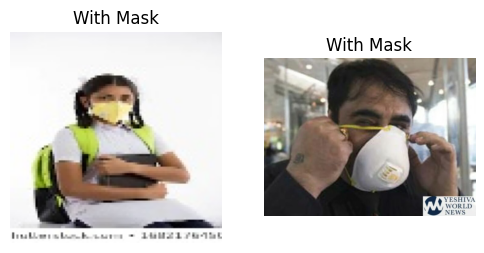

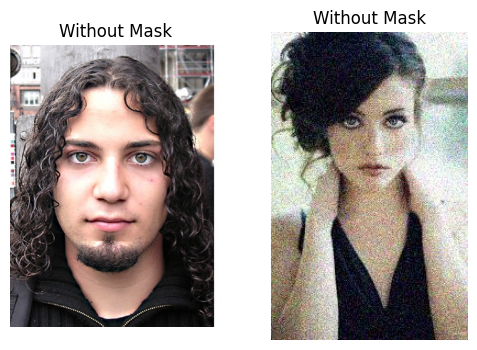

In [ ]:
def display_random_images(folder_path, title):
    images = random.sample(os.listdir(folder_path), 2)
    plt.figure(figsize=(6,4))
    for i, img_name in enumerate(images):
        img = cv2.imread(os.path.join(folder_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1,2,i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

display_random_images(with_mask_path, "With Mask")
display_random_images(without_mask_path, "Without Mask")


IMAGE PRE-PROCESSING




Check image resolutions


In [ ]:
widths = []
heights = []
labels = []

for img_name in os.listdir(with_mask_path):
    img = cv2.imread(os.path.join(with_mask_path, img_name))
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)
    labels.append(0)

for img_name in os.listdir(without_mask_path):
    img = cv2.imread(os.path.join(without_mask_path, img_name))
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)
    labels.append(1)


Scatter Plot

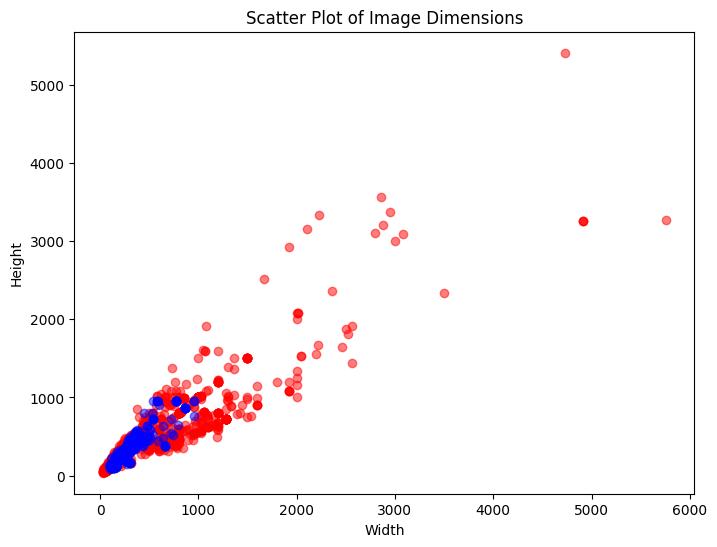

In [ ]:
plt.figure(figsize=(8,6))
for i in range(len(labels)):
    if labels[i] == 0:
        plt.scatter(widths[i], heights[i], color='red', alpha=0.5)
    else:
        plt.scatter(widths[i], heights[i], color='blue', alpha=0.5)

plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Scatter Plot of Image Dimensions")
plt.show()


Create Resize Dataset

In [ ]:
IMG_SIZE = 128

def load_resize_data():
    data = []
    labels = []

    for img_name in os.listdir(with_mask_path):
        img = cv2.imread(os.path.join(with_mask_path, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(0)

    for img_name in os.listdir(without_mask_path):
        img = cv2.imread(os.path.join(without_mask_path, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(1)

    return np.array(data)/255.0, np.array(labels)

X_resize, y_resize = load_resize_data()


Create Crop Dataset

In [ ]:
def center_crop(img):
    h, w, _ = img.shape
    min_dim = min(h, w)
    start_x = w//2 - min_dim//2
    start_y = h//2 - min_dim//2
    return img[start_y:start_y+min_dim, start_x:start_x+min_dim]

def load_crop_data():
    data = []
    labels = []

    for img_name in os.listdir(with_mask_path):
        img = cv2.imread(os.path.join(with_mask_path, img_name))
        img = center_crop(img)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(0)

    for img_name in os.listdir(without_mask_path):
        img = cv2.imread(os.path.join(without_mask_path, img_name))
        img = center_crop(img)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(1)

    return np.array(data)/255.0, np.array(labels)

X_crop, y_crop = load_crop_data()


Neural Network FULLY CONNECTED

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resize, y_resize,
    test_size=0.2,
    stratify=y_resize,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)


Build NN Model

In [ ]:
def build_nn():
    model = models.Sequential([
        layers.Flatten(input_shape=(128,128,3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


Train Model

In [ ]:
history_nn = model_nn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 269ms/step - accuracy: 0.6171 - loss: 6.0259 - val_accuracy: 0.8026 - val_loss: 0.5487
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - accuracy: 0.8168 - loss: 0.5145 - val_accuracy: 0.9005 - val_loss: 0.3335
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 296ms/step - accuracy: 0.8732 - loss: 0.3826 - val_accuracy: 0.8646 - val_loss: 0.3659
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 48s 391ms/step - accuracy: 0.8997 - loss: 0.2512 - val_accuracy: 0.9103 - val_loss: 0.2571
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 310ms/step - accuracy: 0.9007 - loss: 0.2386 - val_accuracy: 0.9282 - val_loss: 0.2385
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 342ms/step - accuracy: 0.8998 - loss: 0.2634 - val_accuracy: 0.8891 - val_loss: 0.3026
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 272ms/step - accuracy: 0.9255 - loss: 0.2027 - val_accuracy: 0.8630 - val_loss: 0.4502
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.9163 - loss: 0.2086 - val_accu

Learning Plot

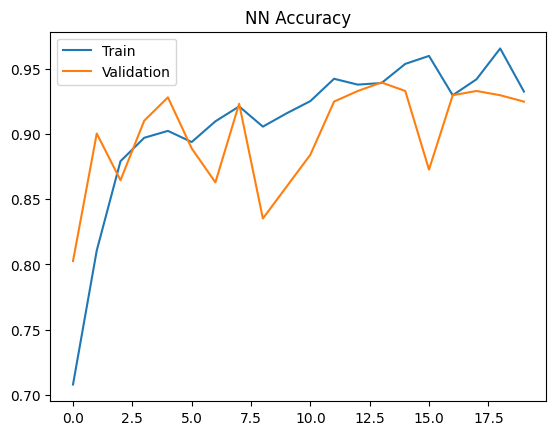

In [ ]:
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.title("NN Accuracy")
plt.legend(["Train","Validation"])
plt.show()


Evaluate

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       383
           1       0.89      0.93      0.91       383

    accuracy                           0.91       766
   macro avg       0.91      0.91      0.91       766
weighted avg       0.91      0.91      0.91       766

Accuracy: 0.9073107049608355


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 333ms/step - accuracy: 0.6007 - loss: 7.7754 - val_accuracy: 0.6215 - val_loss: 1.6812
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 282ms/step - accuracy: 0.8584 - loss: 0.4928 - val_accuracy: 0.9201 - val_loss: 0.2419
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.8991 - loss: 0.2504 - val_accuracy: 0.8825 - val_loss: 0.3263
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.9228 - loss: 0.2024 - val_accuracy: 0.8728 - val_loss: 0.3271
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - accuracy: 0.8693 - loss: 0.3926 - val_accuracy: 0.8744 - val_loss: 0.4111
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9013 - loss: 0.2690 - val_accuracy: 0.9135 - val_loss: 0.2566
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.9340 - loss: 0.1817 - val_accuracy: 0.8499 - val_loss: 0.4215
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - accuracy: 0.9220 - loss: 0.1936 - val_accu

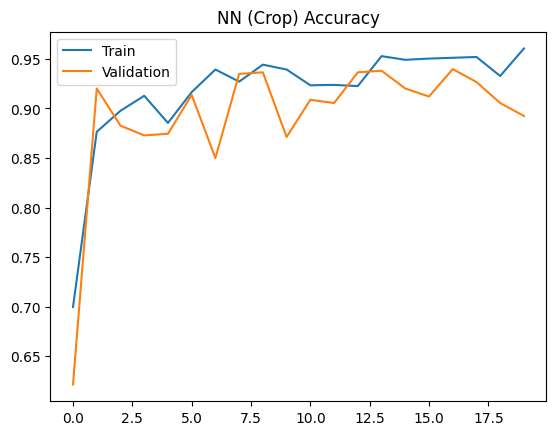

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
NN Crop Dataset Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       383
           1       0.96      0.82      0.88       383

    accuracy                           0.89       766
   macro avg       0.90      0.89      0.89       766
weighted avg       0.90      0.89      0.89       766

Accuracy: 0.8929503916449086


In [ ]:
y_pred = (model_nn.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Stratified split for crop data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_crop, y_crop,
    test_size=0.2,
    stratify=y_crop,
    random_state=42
)

X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(
    X_train_c, y_train_c,
    test_size=0.2,
    stratify=y_train_c,
    random_state=42
)

# Build NN model again
model_nn_crop = models.Sequential([
    layers.Flatten(input_shape=(128,128,3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_nn_crop.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history_nn_crop = model_nn_crop.fit(
    X_train_c, y_train_c,
    validation_data=(X_val_c, y_val_c),
    epochs=20,
    batch_size=32
)

# Plot
plt.plot(history_nn_crop.history['accuracy'])
plt.plot(history_nn_crop.history['val_accuracy'])
plt.title("NN (Crop) Accuracy")
plt.legend(["Train","Validation"])
plt.show()

# Evaluate
y_pred_crop = (model_nn_crop.predict(X_test_c) > 0.5).astype("int32")

print("NN Crop Dataset Report:")
print(classification_report(y_test_c, y_pred_crop))
print("Accuracy:", accuracy_score(y_test_c, y_pred_crop))



Basic CNN

In [ ]:
model_cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Complex CNN

In [ ]:
model_complex = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_complex.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Comparison Bar Plot

In [ ]:
# Generate predictions for Complex CNN
y_pred_complex = model_complex.predict(X_test)
y_pred_complex = (y_pred_complex > 0.5).astype("int32")

print("Complex CNN Report:")
print(classification_report(y_test, y_pred_complex))
print("Accuracy:", accuracy_score(y_test, y_pred_complex))


24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 706ms/step
Complex CNN Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       383
           1       0.00      0.00      0.00       383

    accuracy                           0.50       766
   macro avg       0.25      0.50      0.33       766
weighted avg       0.25      0.50      0.33       766

Accuracy: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


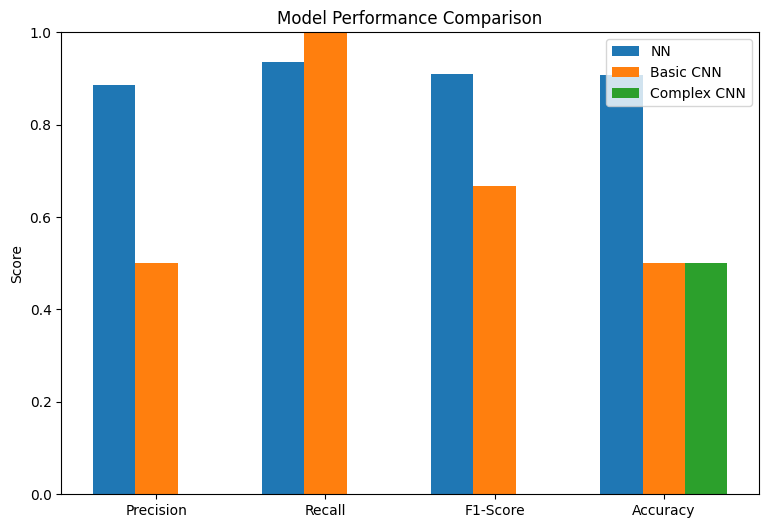

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# =============================
# NN Metrics
# =============================
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)
nn_acc = accuracy_score(y_test, y_pred)

# =============================
# Basic CNN Metrics
# =============================
cnn_precision = precision_score(y_test, y_pred_cnn)
cnn_recall = recall_score(y_test, y_pred_cnn)
cnn_f1 = f1_score(y_test, y_pred_cnn)
cnn_acc = accuracy_score(y_test, y_pred_cnn)

# =============================
# Complex CNN Metrics
# =============================
complex_precision = precision_score(y_test, y_pred_complex)
complex_recall = recall_score(y_test, y_pred_complex)
complex_f1 = f1_score(y_test, y_pred_complex)
complex_acc = accuracy_score(y_test, y_pred_complex)

# =============================
# Bar Plot Comparison
# =============================
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]

nn_scores = [nn_precision, nn_recall, nn_f1, nn_acc]
basic_scores = [cnn_precision, cnn_recall, cnn_f1, cnn_acc]
complex_scores = [complex_precision, complex_recall, complex_f1, complex_acc]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(9,6))

plt.bar(x - width, nn_scores, width, label='NN')
plt.bar(x, basic_scores, width, label='Basic CNN')
plt.bar(x + width, complex_scores, width, label='Complex CNN')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0,1)   # keeps scale between 0 and 1

plt.show()
